<a href="https://colab.research.google.com/github/markisamiller/computer-vision-jupyter-notebooks-fall-2025-RDP/blob/main/Copy_of_Ch7_TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installs for PDF Miner

In [ ]:
!pip install pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Scraping a PDF

In [ ]:
from pdfminer.high_level import extract_text

In [ ]:
aieu = extract_text("/content/drive/MyDrive/FR5236.pdf")

In [ ]:
aius = extract_text("/content/drive/MyDrive/FR5236.pdf")

In [ ]:
aican = extract_text("/content/drive/MyDrive/FR5236.pdf")

In [ ]:
aius

' Canada’s Arctic Foreign Policy \x0cCette publication est aussi disponible en français sous le titre : La Politique étrangère du Canada pour l’Arctique.\n\nInformation contained in this publication or product may be reproduced, in part or in whole, and by any means, for \npersonal or public non-commercial purposes without charge or further permission, unless otherwise specified.  \nCommercial reproduction and distribution are prohibited except with written permission from Global Affairs Canada.\n\nFor more information, contact:\n\nGlobal Affairs Canada \n125 Sussex Drive \nOttawa ON  K1A 0G2 \nCanada\n\nTelephone: \n1-800-267-8376 (toll-free in Canada) \n613-944-4000 (in the National Capital Region and outside Canada)\n\nIf you are deaf or hard of hearing, or if you have a speech impediment and use a text telephone, you can access the \nTTY service from 9 a.m. to 5 p.m. Eastern Time by calling 613-944-9136 (in Canada only).\n\nWebsite: www.international.gc.ca \nEmail: info@internation

## Preprocessing Pipeline

In [ ]:
import re

In [ ]:
def clean_text(text):
    text = re.sub('\xa0', ' ', text)
    text = re.sub('\n•', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\ue080', ' ', text)
    text = re.sub('\x0c', ' ', text)
    html = re.compile('[<,#*?>]')
    text = html.sub(r' ',text)
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r' ',text)
    email = re.compile(r'[A-Za-z0-9]+@\w+\.\w+')
    text = email.sub(r' ',text)
    return text

In [ ]:
aican = clean_text(aican)

In [ ]:
aican

' Canada’s Arctic Foreign Policy  Cette publication est aussi disponible en français sous le titre : La Politique étrangère du Canada pour l’Arctique.  Information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified.   Commercial reproduction and distribution are prohibited except with written permission from Global Affairs Canada.  For more information  contact:  Global Affairs Canada  125 Sussex Drive  Ottawa ON  K1A 0G2  Canada  Telephone:  1-800-267-8376 (toll-free in Canada)  613-944-4000 (in the National Capital Region and outside Canada)  If you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  TTY service from 9 a.m. to 5 p.m. Eastern Time by calling 613-944-9136 (in Canada only).  Website:    Email:  .ca  © His Majesty the King in Right of Canada  as represente

In [ ]:
aius = clean_text(aius)

In [ ]:
aieu = clean_text(aieu)

In [ ]:
aican

' Canada’s Arctic Foreign Policy  Cette publication est aussi disponible en français sous le titre : La Politique étrangère du Canada pour l’Arctique.  Information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified.   Commercial reproduction and distribution are prohibited except with written permission from Global Affairs Canada.  For more information  contact:  Global Affairs Canada  125 Sussex Drive  Ottawa ON  K1A 0G2  Canada  Telephone:  1-800-267-8376 (toll-free in Canada)  613-944-4000 (in the National Capital Region and outside Canada)  If you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  TTY service from 9 a.m. to 5 p.m. Eastern Time by calling 613-944-9136 (in Canada only).  Website:    Email:  .ca  © His Majesty the King in Right of Canada  as represente

## Processing Pipeline for Word Tokenization

In [ ]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import svgling
import string

In [ ]:
nltk.download('stopwords')
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download("maxent_ne_chunker_tab")
nltk.download("words")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
def token_creator(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    stemmer = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()

    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    pos_tags = pos_tag(lowercase_tokens)

    named_entities = ne_chunk(pos_tags)

    return named_entities, pos_tags, lowercase_tokens, stemmed_tokens

In [ ]:
aican_named_entities, aican_pos_tags, aican_lowercase_tokens, aican_stemmed_tokens = token_creator(aican)

In [ ]:
aius_named_entities, aius_pos_tags, aius_lowercase_tokens, aius_stemmed_tokens = token_creator(aius)

In [ ]:
aieu_named_entities, aieu_pos_tags, aieu_lowercase_tokens, aieu_stemmed_tokens = token_creator(aieu)

In [ ]:
aican_stemmed_tokens

['canada',
 '’',
 'arctic',
 'foreign',
 'polici',
 'cett',
 'public',
 'est',
 'aussi',
 'dispon',
 'en',
 'françai',
 'sous',
 'le',
 'titr',
 ':',
 'la',
 'politiqu',
 'étrangèr',
 'du',
 'canada',
 'pour',
 'l',
 '’',
 'arctiqu',
 '.',
 'inform',
 'contain',
 'public',
 'product',
 'may',
 'reproduc',
 'part',
 'whole',
 'mean',
 'person',
 'public',
 'non-commerci',
 'purpos',
 'without',
 'charg',
 'permiss',
 'unless',
 'otherwis',
 'specifi',
 '.',
 'commerci',
 'reproduct',
 'distribut',
 'prohibit',
 'except',
 'written',
 'permiss',
 'global',
 'affair',
 'canada',
 '.',
 'inform',
 'contact',
 ':',
 'global',
 'affair',
 'canada',
 '125',
 'sussex',
 'drive',
 'ottawa',
 'k1a',
 '0g2',
 'canada',
 'telephon',
 ':',
 '1-800-267-8376',
 '(',
 'toll-fre',
 'canada',
 ')',
 '613-944-4000',
 '(',
 'nation',
 'capit',
 'region',
 'outsid',
 'canada',
 ')',
 'deaf',
 'hard',
 'hear',
 'speech',
 'impedi',
 'use',
 'text',
 'telephon',
 'access',
 'tti',
 'servic',
 '9',
 'a.m.',
 

In [ ]:
aican_lowercase_tokens

['canada',
 '’',
 'arctic',
 'foreign',
 'policy',
 'cette',
 'publication',
 'est',
 'aussi',
 'disponible',
 'en',
 'français',
 'sou',
 'le',
 'titre',
 'la',
 'politique',
 'étrangère',
 'du',
 'canada',
 'pour',
 'l',
 '’',
 'arctique',
 'information',
 'contained',
 'publication',
 'product',
 'may',
 'reproduced',
 'part',
 'whole',
 'mean',
 'personal',
 'public',
 'non-commercial',
 'purpose',
 'without',
 'charge',
 'permission',
 'unless',
 'otherwise',
 'specified',
 'commercial',
 'reproduction',
 'distribution',
 'prohibited',
 'except',
 'written',
 'permission',
 'global',
 'affairs',
 'canada',
 'information',
 'contact',
 'global',
 'affairs',
 'canada',
 'sussex',
 'drive',
 'ottawa',
 'k1a',
 '0g2',
 'canada',
 'telephone',
 '1-800-267-8376',
 'toll-free',
 'canada',
 '613-944-4000',
 'national',
 'capital',
 'region',
 'outside',
 'canada',
 'deaf',
 'hard',
 'hearing',
 'speech',
 'impediment',
 'use',
 'text',
 'telephone',
 'access',
 'tty',
 'service',
 'a.m.',

In [ ]:
aican_pos_tags

[('canada', 'NN'),
 ('’', 'NNP'),
 ('arctic', 'JJ'),
 ('foreign', 'JJ'),
 ('policy', 'NN'),
 ('cette', 'NN'),
 ('publication', 'NN'),
 ('est', 'JJS'),
 ('aussi', 'NN'),
 ('disponible', 'JJ'),
 ('en', 'NN'),
 ('français', 'NN'),
 ('sou', 'NN'),
 ('le', 'NN'),
 ('titre', 'NN'),
 ('la', 'NN'),
 ('politique', 'NN'),
 ('étrangère', 'NNP'),
 ('du', 'VBZ'),
 ('canada', 'VB'),
 ('pour', 'JJ'),
 ('l', 'NN'),
 ('’', 'NNP'),
 ('arctique', 'NN'),
 ('information', 'NN'),
 ('contained', 'VBN'),
 ('publication', 'NN'),
 ('product', 'NN'),
 ('may', 'MD'),
 ('reproduced', 'VB'),
 ('part', 'NN'),
 ('whole', 'JJ'),
 ('mean', 'JJ'),
 ('personal', 'JJ'),
 ('public', 'JJ'),
 ('non-commercial', 'JJ'),
 ('purpose', 'NN'),
 ('without', 'IN'),
 ('charge', 'NN'),
 ('permission', 'NN'),
 ('unless', 'IN'),
 ('otherwise', 'RB'),
 ('specified', 'VBN'),
 ('commercial', 'JJ'),
 ('reproduction', 'NN'),
 ('distribution', 'NN'),
 ('prohibited', 'VBD'),
 ('except', 'IN'),
 ('written', 'VBN'),
 ('permission', 'NN'),
 ('glo

## Sentence Tokenization

In [ ]:
from nltk.tokenize import sent_tokenize


In [ ]:
def token_sent_creator(clean_text):

    sentences = sent_tokenize(clean_text)
    sentences = [sent.lower().replace(".", "") for sent in sentences]
    return sentences

In [ ]:
aican_sentence = token_sent_creator(aican)


In [ ]:
aius_sentence = token_sent_creator(aius)

In [ ]:
aieu_sentence = token_sent_creator(aieu)

In [ ]:
aican_sentence

[' canada’s arctic foreign policy  cette publication est aussi disponible en français sous le titre : la politique étrangère du canada pour l’arctique',
 'information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified',
 'commercial reproduction and distribution are prohibited except with written permission from global affairs canada',
 'for more information  contact:  global affairs canada  125 sussex drive  ottawa on  k1a 0g2  canada  telephone:  1-800-267-8376 (toll-free in canada)  613-944-4000 (in the national capital region and outside canada)  if you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  tty service from 9 am to 5 pm eastern time by calling 613-944-9136 (in canada only)',
 'website:    email:  ca  © his majesty the king in right of canada  as represe

## Word Count

In [ ]:
import pandas as pd
from nltk.probability import FreqDist

In [ ]:
wc = FreqDist(aican_lowercase_tokens)

In [ ]:
wc

FreqDist({'arctic': 545, 'canada': 405, '’': 258, 'indigenous': 149, 'policy': 134, 'foreign': 115, 'north': 93, 'security': 92, 'international': 92, 'northern': 87, ...})

In [ ]:
df_wc = pd.DataFrame(wc.items(), columns=["word", "freq"])

In [ ]:
df_wc.sort_values(by=["freq"], ascending=False)

,word,freq
2,arctic,545
0,canada,405
1,’,258
205,indigenous,149
4,policy,134
...,...,...
2000,tremendous,1
15,la,1
14,titre,1
13,le,1


In [ ]:
def token_with_stop(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = ["ai", "generative", "use", "using", "``", "’", "10/31/2023", "canada.ca", "pm", "9:45", "may", "also", "could"] + list(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    return lowercase_tokens

In [ ]:
aican_lowercase_tokens = token_with_stop(aican)

In [ ]:
wc = FreqDist(aican_lowercase_tokens)

In [ ]:
df_wc = pd.DataFrame(wc.items(), columns=["word", "freq"])

In [ ]:
top_wc = df_wc[df_wc.freq > 20].sort_values(by=["freq"], ascending=False)
top_wc

,word,freq
1,arctic,545
0,canada,405
202,indigenous,149
3,policy,134
2,foreign,115
...,...,...
287,military,21
338,nato,21
475,committed,21
650,agreement,21


In [ ]:
import matplotlib.pyplot as plt

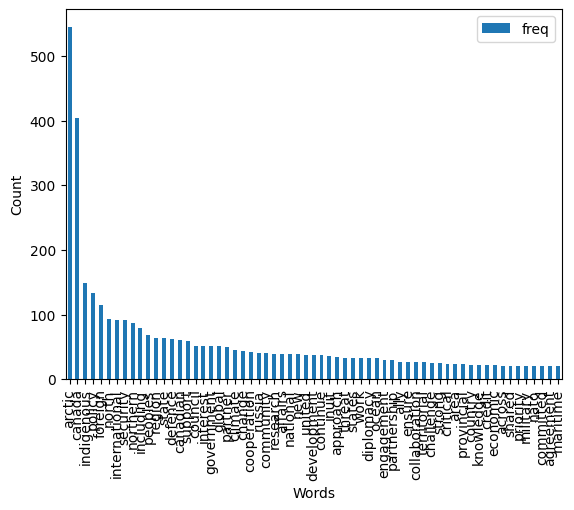

In [ ]:
top_wc.plot(x="word", kind='bar')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Word Cloud

In [ ]:
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

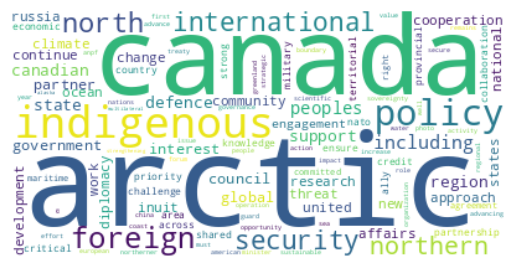

In [ ]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wc))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
aieu

' Canada’s Arctic Foreign Policy  Cette publication est aussi disponible en français sous le titre : La Politique étrangère du Canada pour l’Arctique.  Information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified.   Commercial reproduction and distribution are prohibited except with written permission from Global Affairs Canada.  For more information  contact:  Global Affairs Canada  125 Sussex Drive  Ottawa ON  K1A 0G2  Canada  Telephone:  1-800-267-8376 (toll-free in Canada)  613-944-4000 (in the National Capital Region and outside Canada)  If you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  TTY service from 9 a.m. to 5 p.m. Eastern Time by calling 613-944-9136 (in Canada only).  Website:    Email:  .ca  © His Majesty the King in Right of Canada  as represente

In [ ]:
aieu_lowercase_tokens = token_with_stop(aieu)

In [ ]:
wcEU = FreqDist(aieu_lowercase_tokens)

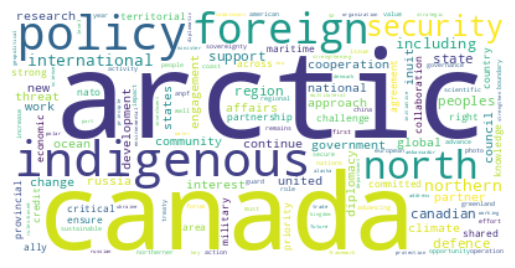

In [ ]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wcEU))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
aius

' Canada’s Arctic Foreign Policy  Cette publication est aussi disponible en français sous le titre : La Politique étrangère du Canada pour l’Arctique.  Information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified.   Commercial reproduction and distribution are prohibited except with written permission from Global Affairs Canada.  For more information  contact:  Global Affairs Canada  125 Sussex Drive  Ottawa ON  K1A 0G2  Canada  Telephone:  1-800-267-8376 (toll-free in Canada)  613-944-4000 (in the National Capital Region and outside Canada)  If you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  TTY service from 9 a.m. to 5 p.m. Eastern Time by calling 613-944-9136 (in Canada only).  Website:    Email:  .ca  © His Majesty the King in Right of Canada  as represente

In [ ]:
aius_lowercase_tokens = token_with_stop(aius)

In [ ]:
wcUS = FreqDist(aius_lowercase_tokens)

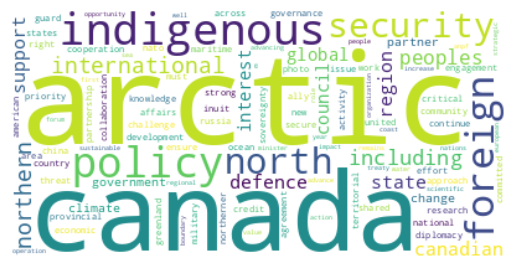

In [ ]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(dict(wcUS))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
can_coloring = np.array(Image.open("/content/drive/MyDrive/canadaimage.jpeg"))

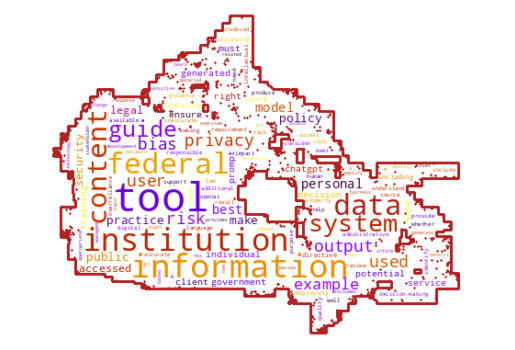

In [ ]:
wordcloud = WordCloud(background_color="white", mask=can_coloring, contour_width=3, colormap = "gnuplot", contour_color='firebrick')
wordcloud.generate_from_frequencies(dict(wc))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Survey Reponses

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainclean.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainclean.xlsx'

In [ ]:
df.head()

,Respondent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8a,Q8b,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24
0,1,Increasing pay,Full Time,3.0,Additional funding for Counselling,No,1,No,1,3,...,4,NaN,0.0,4,Better lighting in the parking lot,4,More women in leadership positions,Yes,East,15.0
1,2,Improve benefits,Full Time,1.0,Drug coverage,Yes,3,Yes,3,4,...,2,Be able to work from home once a week,0.0,3,NaN,4,NaN,No,North,2.0
2,3,Job security,Part Time,NaN,NaN,No,1,No,3,1,...,3,Give me more hours,0.0,3,NaN,5,NaN,No,North,NaN
3,4,Job security,Part Time,NaN,NaN,I don't know,4,No,3,2,...,2,more flexibility on work from home for part time,0.0,4,NaN,4,NaN,Yes,East,1.0
4,5,Improve working conditions,Full Time,3.0,Wellness account,Yes,3,No,2,3,...,2,More control over how I do my work and where,0.0,2,Visible minorities are not given same project ...,2,Visible minorities are not given same project ...,Prefer not to answer,South,6.0


In [ ]:
df['Q16'] = df['Q16'].astype(str)

In [ ]:
text = " ".join(answer for answer in df["Q16"])

In [ ]:
text

"nan Be able to work from home once a week Give me more hours more flexibility on work from home for part time More control over how I do my work and where More guaranteed hours each week Closer parking Provide childcare on site provide childcare or provide more flexibility as to when I work so that I can work around childcare not all areas of the campus are wheelchair accessible provide bonus pay to those working the night shift provide childcare provide up to date technology so that I can do my job. My computer is ten years old and very slow. more opportunities for overtime Greater flexibility in work hours. Able to work a 4 day work week. More mentoring opportunities incentive pay for those who have to come in earlier than others ability to work 4 day work week leadership training opportunities, able to work at campus closer to where I live My boss is an ass who makes us all come in an hour before other departments. When I asked to transfer locations, my request was denied. give me 

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stop_words = ["nan"] + list(STOPWORDS)

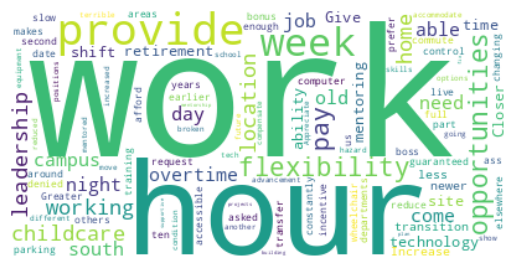

In [ ]:
wordcloud = WordCloud(stopwords=stop_words, colormap="viridis", background_color="white")
wordcloud.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
stop_words = ["nan", "work"] + list(STOPWORDS)

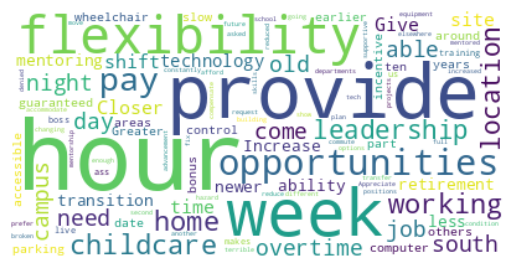

In [ ]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white")
wordcloud.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['Q16'] = df['Q16'].astype(str)

In [ ]:
df1 = df[df["Q2"] == "Part Time"]

In [ ]:
df2 = df[df["Q2"] == "Full Time"]

In [ ]:
text1 = " ".join(answer for answer in df1["Q16"])

In [ ]:
text2 = " ".join(answer for answer in df2["Q16"])

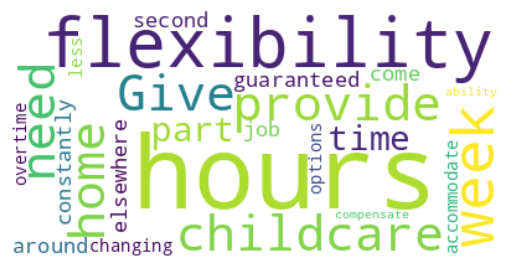

In [ ]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white")
wordcloud.generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

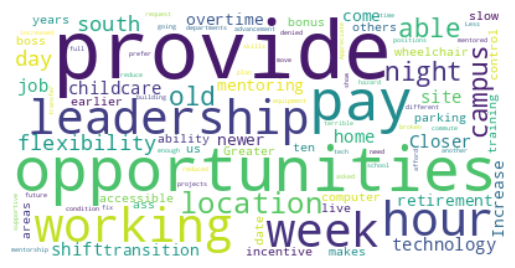

In [ ]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white")
wordcloud.generate(text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Count Vectorizer

In [ ]:
aican = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aican1.pdf")
aican = aican.decode("utf-8")

In [ ]:
aican

'Guide on the use of Generative AI - Canada.ca\n\nhttps://www.canada.ca/en/government/system/digital-government/digita...\n\nCanada.ca\n\n\ue080\n\nAbout\xa0government\n\n\ue080\n\nGovernment\xa0in\xa0a\xa0digital\xa0age\n\n\ue080\n\nDigital\xa0government\xa0innovation\n\n\ue080\n\nResponsible\xa0use\xa0of\xa0artificial\xa0intelligence\xa0(AI)\n\nGuide on the use of Generative AI\n\nTable of contents\n\n• Overview\n• What\xa0is\xa0generative\xa0AI?\n• Challenges\xa0and\xa0concerns\n• Recommended\xa0approach\n• Policy\xa0considerations\xa0and\xa0best\xa0practices\n• Use\xa0of\xa0this\xa0guide\xa0and\xa0additional\xa0support\xa0available\n• Frequently\xa0asked\xa0questions\n\nOverview\nGenerative\xa0artificial\xa0intelligence\xa0(AI)\xa0tools\xa0offer\xa0many\xa0potential\xa0benefits\xa0to\nGovernment\xa0of\xa0Canada\xa0(GC)\xa0institutions.\xa0Federal\xa0institutions\xa0should\nexplore\xa0potential\xa0uses\xa0of\xa0generative\xa0AI\xa0tools\xa0for\xa0supporting\xa0and\nimproving\xa0thei

In [ ]:
aican = clean_text(aican)

In [ ]:
aican

'Guide on the use of Generative AI - Canada.ca     Canada.ca     About government     Government in a digital age     Digital government innovation     Responsible use of artificial intelligence (AI)  Guide on the use of Generative AI  Table of contents   Overview  What is generative AI   Challenges and concerns  Recommended approach  Policy considerations and best practices  Use of this guide and additional support available  Frequently asked questions  Overview Generative artificial intelligence (AI) tools offer many potential benefits to Government of Canada (GC) institutions. Federal institutions should explore potential uses of generative AI tools for supporting and improving their operations. However  because these tools are evolving  they should not be used in all cases. Federal institutions must be cautious and evaluate the risks before they start using them. The use of these tools should be restricted to instances where risks can be effectively managed.  1 of 27  10/31/2023  9

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
corpus_aican = [aican]

In [ ]:
count_vect = CountVectorizer(stop_words='english')
BOW = count_vect.fit_transform(corpus_aican)
count_vect.vocabulary_

{'guide': 489,
 'use': 1101,
 'generative': 473,
 'ai': 71,
 'canada': 177,
 'ca': 172,
 'government': 480,
 'digital': 341,
 'age': 69,
 'innovation': 556,
 'responsible': 923,
 'artificial': 105,
 'intelligence': 569,
 'table': 1031,
 'contents': 261,
 'overview': 752,
 'challenges': 192,
 'concerns': 239,
 'recommended': 881,
 'approach': 96,
 'policy': 785,
 'considerations': 247,
 'best': 150,
 'practices': 800,
 'additional': 62,
 'support': 1021,
 'available': 135,
 'frequently': 457,
 'asked': 108,
 'questions': 865,
 'tools': 1059,
 'offer': 719,
 'potential': 795,
 'benefits': 149,
 'gc': 465,
 'institutions': 563,
 'federal': 443,
 'explore': 428,
 'uses': 1105,
 'supporting': 1022,
 'improving': 528,
 'operations': 734,
 'evolving': 417,
 'used': 1102,
 'cases': 184,
 'cautious': 187,
 'evaluate': 411,
 'risks': 939,
 'start': 994,
 'using': 1106,
 'restricted': 926,
 'instances': 560,
 'effectively': 374,
 'managed': 655,
 '27': 26,
 '10': 3,
 '31': 29,
 '2023': 19,
 '45':

In [ ]:
sum_words = BOW.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [ ]:
words_freq

[('ai', np.int64(189)),
 ('generative', np.int64(150)),
 ('use', np.int64(106)),
 ('tools', np.int64(65)),
 ('2023', np.int64(62)),
 ('information', np.int64(56)),
 ('institutions', np.int64(49)),
 ('federal', np.int64(48)),
 ('data', np.int64(45)),
 ('content', np.int64(42)),
 ('guide', np.int64(37)),
 ('canada', np.int64(32)),
 ('27', np.int64(31)),
 ('10', np.int64(31)),
 ('ca', np.int64(29)),
 ('privacy', np.int64(29)),
 ('31', np.int64(27)),
 ('45', np.int64(27)),
 ('pm', np.int64(27)),
 ('outputs', np.int64(27)),
 ('used', np.int64(26)),
 ('users', np.int64(24)),
 ('personal', np.int64(23)),
 ('public', np.int64(22)),
 ('example', np.int64(22)),
 ('tool', np.int64(22)),
 ('best', np.int64(21)),
 ('practices', np.int64(21)),
 ('risks', np.int64(21)),
 ('using', np.int64(21)),
 ('models', np.int64(20)),
 ('making', np.int64(19)),
 ('policy', np.int64(18)),
 ('legal', np.int64(17)),
 ('security', np.int64(17)),
 ('biases', np.int64(17)),
 ('make', np.int64(17)),
 ('systems', np.int6

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

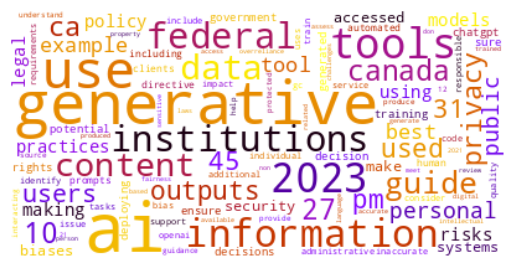

In [ ]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(dict(words_freq))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
new_stopwords = ["ai", "generative", "use", "27", "45", "10", "2023", "using", "``", "’", "31", "canada.ca", "pm", "9:45", "may", "also", "could"]

In [ ]:
words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])

In [ ]:
words_freq_df.head()

,word,freq
0,ai,189
1,generative,150
2,use,106
3,tools,65
4,2023,62


In [ ]:
words_freq_df = words_freq_df[~words_freq_df['word'].isin(new_stopwords)]

In [ ]:
words_freq_df.head()

,word,freq
3,tools,65
5,information,56
6,institutions,49
7,federal,48
8,data,45


In [ ]:
words_freq_dict = words_freq_df.set_index('word').to_dict()['freq']

In [ ]:
words_freq_dict

{'tools': 65,
 'information': 56,
 'institutions': 49,
 'federal': 48,
 'data': 45,
 'content': 42,
 'guide': 37,
 'canada': 32,
 'ca': 29,
 'privacy': 29,
 'outputs': 27,
 'used': 26,
 'users': 24,
 'personal': 23,
 'public': 22,
 'example': 22,
 'tool': 22,
 'best': 21,
 'practices': 21,
 'risks': 21,
 'models': 20,
 'making': 19,
 'policy': 18,
 'legal': 17,
 'security': 17,
 'biases': 17,
 'make': 17,
 'systems': 17,
 'accessed': 17,
 'government': 16,
 'potential': 16,
 'training': 16,
 'ensure': 16,
 'generated': 16,
 'decision': 15,
 'chatgpt': 14,
 'rights': 13,
 'sure': 13,
 'decisions': 13,
 'deploying': 12,
 'including': 12,
 'human': 12,
 'directive': 12,
 'prompts': 12,
 'automated': 11,
 'clients': 11,
 'administrative': 11,
 'consider': 11,
 'service': 10,
 'include': 10,
 'requirements': 10,
 'identify': 10,
 'impact': 10,
 'responsible': 9,
 'additional': 9,
 'support': 9,
 'gc': 9,
 'uses': 9,
 'tasks': 9,
 'code': 9,
 'inaccurate': 9,
 'openai': 9,
 'individual': 9,


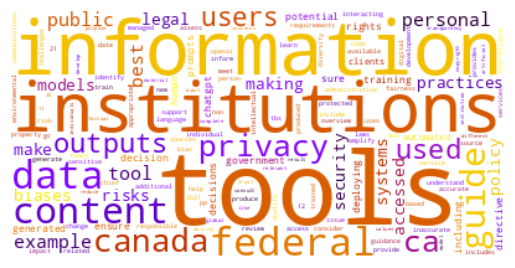

In [ ]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(words_freq_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Ngrams

In [ ]:
aican = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aican1.pdf")
aican = aican.decode("utf-8")

In [ ]:
aican = clean_text(aican)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
corpus_aican = [aican]

In [ ]:
top_wf_comb = []

In [ ]:
def frequency_table(ngram_min, ngram_max, corpus):
   for i in range (ngram_min, ngram_max+1):
        count_vect = CountVectorizer(ngram_range=(i, i), stop_words='english', max_features=100)
        BOW = count_vect.fit_transform(corpus)
        sum_words = BOW.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])
        top_wf = words_freq_df[words_freq_df.freq > 10].sort_values(by=["freq"], ascending=False)
        top_wf_comb.append(top_wf)
   return top_wf_comb

In [ ]:
top_wf_comb = frequency_table(1, 3, corpus_aican)

In [ ]:
top_wf_comb

[              word  freq
 0               ai   189
 1       generative   150
 2              use   106
 3            tools    65
 4             2023    62
 5      information    56
 6     institutions    49
 7          federal    48
 8             data    45
 9          content    42
 10           guide    37
 11          canada    32
 12              27    31
 13              10    31
 14              ca    29
 15         privacy    29
 16              31    27
 17              45    27
 18              pm    27
 19         outputs    27
 20            used    26
 21           users    24
 22        personal    23
 23          public    22
 24         example    22
 25            tool    22
 26            best    21
 27       practices    21
 28           risks    21
 29           using    21
 30          models    20
 31          making    19
 32          policy    18
 33           legal    17
 34        security    17
 35          biases    17
 36            make    17
 37         

In [ ]:
new_bigrams = [b for b in top_wf_comb[1]["word"] if all(b not in t for t in top_wf_comb[2]["word"])]

In [ ]:
new_bigrams

['federal institutions',
 'personal information',
 'best practices',
 'decision making',
 'training data',
 'accessed 2023',
 '2023 accessed']

In [ ]:
top_wf_comb[1] = top_wf_comb[1][top_wf_comb[1]['word'].isin(new_bigrams)]

In [ ]:
new_unigrams = [b for b in top_wf_comb[0]["word"] if all(b not in t for t in top_wf_comb[1]["word"])]

In [ ]:
top_wf_comb[0] = top_wf_comb[0][top_wf_comb[0]['word'].isin(new_unigrams)]

In [ ]:
topwf = pd.concat(top_wf_comb)

In [ ]:
topwf[topwf.freq > 10].sort_values(by=["freq"], ascending=False)

,word,freq
1,generative,150
2,use,106
3,tools,65
0,use generative ai,65
9,content,42
...,...,...
57,consider,11
54,automated,11
55,clients,11
20,2023 accessed,11


In [ ]:
new_stopwords = ["use", "used", "27", "45", "10", "10 31", "27 10", "2023 45", "31 2023", "45 pm", "2023", "using", "``", "’", "31", "canada.ca", "pm", "9:45", "may", "also", "could"]

In [ ]:
words_freq_df = topwf[~topwf['word'].isin(new_stopwords)]

In [ ]:
words_freq_dict = words_freq_df.set_index('word').to_dict()['freq']

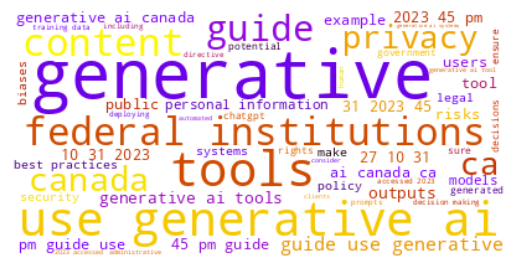

In [ ]:
wordcloud = WordCloud(background_color="white", colormap = "gnuplot")
wordcloud.generate_from_frequencies(words_freq_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Zipf's Law

In [ ]:
aican

' Canada’s Arctic Foreign Policy  Cette publication est aussi disponible en français sous le titre : La Politique étrangère du Canada pour l’Arctique.  Information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified.   Commercial reproduction and distribution are prohibited except with written permission from Global Affairs Canada.  For more information  contact:  Global Affairs Canada  125 Sussex Drive  Ottawa ON  K1A 0G2  Canada  Telephone:  1-800-267-8376 (toll-free in Canada)  613-944-4000 (in the National Capital Region and outside Canada)  If you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  TTY service from 9 a.m. to 5 p.m. Eastern Time by calling 613-944-9136 (in Canada only).  Website:    Email:  .ca  © His Majesty the King in Right of Canada  as represente

In [ ]:
import re

In [ ]:
def remove_numbers(text):
  text = re.sub("\\d.", "", text)
  text = re.sub("[:\\//,]", "", text )
  return text

In [ ]:
aieu = remove_numbers(aieu)

In [ ]:
aican

' Canada’s Arctic Foreign Policy  Cette publication est aussi disponible en français sous le titre : La Politique étrangère du Canada pour l’Arctique.  Information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified.   Commercial reproduction and distribution are prohibited except with written permission from Global Affairs Canada.  For more information  contact:  Global Affairs Canada  125 Sussex Drive  Ottawa ON  K1A 0G2  Canada  Telephone:  1-800-267-8376 (toll-free in Canada)  613-944-4000 (in the National Capital Region and outside Canada)  If you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  TTY service from 9 a.m. to 5 p.m. Eastern Time by calling 613-944-9136 (in Canada only).  Website:    Email:  .ca  © His Majesty the King in Right of Canada  as represente

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [ ]:
corpus_aieu = [aieu]

In [ ]:
corpus_aican = [aican]

In [ ]:
top_wf_comb = []

In [ ]:
def frequency_table(ngram_min, ngram_max, corpus):
   for i in range (ngram_min, ngram_max+1):
        count_vect = CountVectorizer(ngram_range=(i, i), stop_words='english', max_features=100)
        BOW = count_vect.fit_transform(corpus)
        sum_words = BOW.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        words_freq_df = pd.DataFrame(words_freq, columns=["word", "freq"])
        top_wf = words_freq_df[words_freq_df.freq > 10].sort_values(by=["freq"], ascending=False)
        top_wf_comb.append(top_wf)
   return top_wf_comb

In [ ]:
top_wf_comb = frequency_table(1, 2, corpus_aieu)

In [ ]:
top_wf_comb[1]

,word,freq
0,foreign policy,93
1,arctic foreign,81
2,canada arctic,78
3,indigenous peoples,69
4,arctic northern,52
5,northern indigenous,45
6,climate change,39
7,arctic council,36
8,affairs canada,35
9,united states,34


In [ ]:
new_bigrams = [b for b in top_wf_comb[1]["word"] if all(b not in t for t in top_wf_comb[2]["word"])]
top_wf_comb[1] = top_wf_comb[1][top_wf_comb[1]["word"].isin(new_bigrams)]

IndexError: list index out of range

In [ ]:
new_unigrams = [b for b in top_wf_comb[0]["word"] if all(b not in t for t in top_wf_comb[1]["word"])]
top_wf_comb[0] = top_wf_comb[0][top_wf_comb[0]["word"].isin(new_unigrams)]

In [ ]:
topwf = pd.concat(top_wf_comb)

In [ ]:
topwf_aieu = topwf.sort_values(by=["freq"], ascending=False)

In [ ]:
topwf_aieu.head()

,word,freq
0,foreign policy,93
1,arctic foreign,81
10,including,80
2,canada arctic,78
3,indigenous peoples,69


In [ ]:
top_wf_comb = frequency_table(1, 2, corpus_aican)

In [ ]:
top_wf_comb[1]

,word,freq
0,foreign policy,93
1,arctic foreign,81
2,canada arctic,78
3,indigenous peoples,69
4,arctic northern,52
5,northern indigenous,45
6,climate change,39
7,arctic council,36
8,affairs canada,35
9,united states,34


In [ ]:
topwf_aican = topwf.sort_values(by=["freq"], ascending=False)

In [ ]:
topwf_aican.head()

,word,freq
0,foreign policy,93
1,arctic foreign,81
10,including,80
2,canada arctic,78
3,indigenous peoples,69


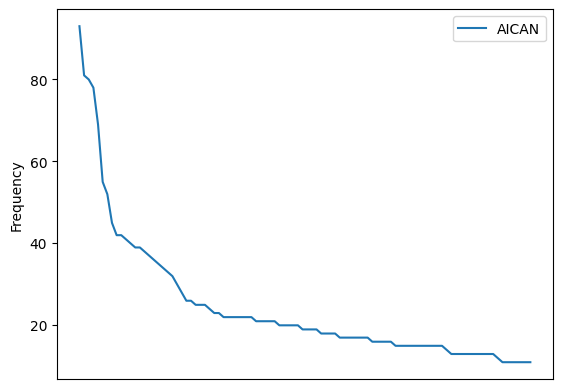

In [ ]:
plt.plot(topwf_aican["word"], topwf_aican["freq"])
plt.legend(["AICAN"])
plt.xticks([])
plt.ylabel("Frequency")
plt.show()

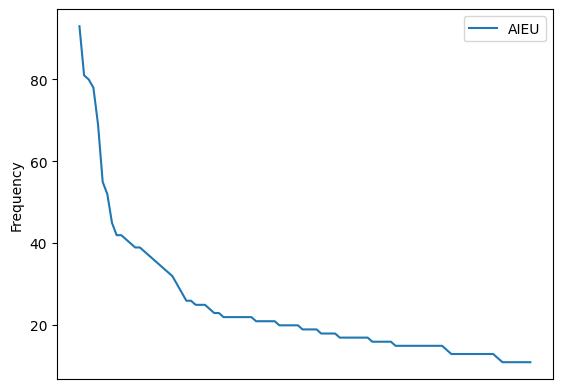

In [ ]:
plt.plot(topwf_aieu["word"], topwf_aieu["freq"])
plt.legend(["AIEU"])
plt.xticks([])
plt.ylabel("Frequency")
plt.show()

In [ ]:
topwf_aieu = topwf_aieu.reset_index(drop=True)

In [ ]:
def smoothify(yInput, topwordlist):
    x = np.array(range(0,len(topwordlist.index)))
    y = np.array(yInput)
    x_smooth = np.linspace(x.min(), x.max(), 600)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

In [ ]:
ziffianCurveValues = [100/i for i in range(1, len(topwf_aieu.index)+1)]

In [ ]:
x, y = smoothify(ziffianCurveValues, topwf_aieu)

In [ ]:
freq_per = topwf_aieu["freq"]/topwf_aieu["freq"][0]*100

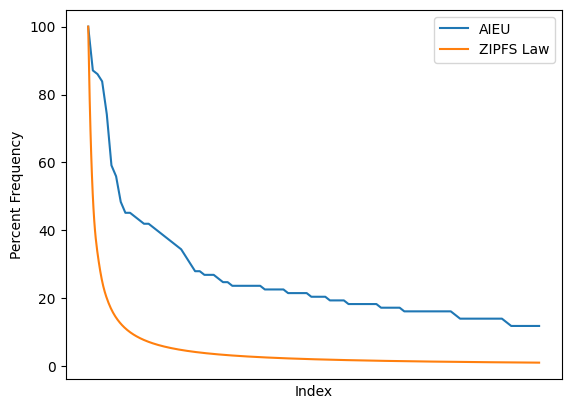

In [ ]:
plt.plot(topwf_aieu.index, freq_per)
plt.plot(x,y)
plt.legend(["AIEU", "ZIPFS Law"])
plt.xticks([])
plt.ylabel("Percent Frequency")
plt.xlabel("Index")
plt.show()

PRACTICE

Plot Zipfs law for AIUS and AICAN. Compare to AIEU.

## Word Search

In [ ]:
aican_sentence

[' canada’s arctic foreign policy  cette publication est aussi disponible en français sous le titre : la politique étrangère du canada pour l’arctique',
 'information contained in this publication or product may be reproduced  in part or in whole  and by any means  for  personal or public non-commercial purposes without charge or further permission  unless otherwise specified',
 'commercial reproduction and distribution are prohibited except with written permission from global affairs canada',
 'for more information  contact:  global affairs canada  125 sussex drive  ottawa on  k1a 0g2  canada  telephone:  1-800-267-8376 (toll-free in canada)  613-944-4000 (in the national capital region and outside canada)  if you are deaf or hard of hearing  or if you have a speech impediment and use a text telephone  you can access the  tty service from 9 am to 5 pm eastern time by calling 613-944-9136 (in canada only)',
 'website:    email:  ca  © his majesty the king in right of canada  as represe

In [ ]:
def hasKeyword(sentence, keyword):

  context = []

  for sent in sentence:
    if keyword in sent:
      context.append(sent)

  return context

In [ ]:
safety = hasKeyword(aican_sentence, "gaps")

In [ ]:
safety

['strengthening research security  international scientific collaboration plays an important  role in addressing gaps in knowledge of the arctic  region  including in relation to climate change',
 'advancing indigenous    and northern foreign    policy priorities  broadening canada’s international engagement to   contribute more directly to domestic issues  such as  closing socio-economic gaps  supporting infrastructure  development  enhancing knowledge of the north    protecting the arctic environment and advancing   reconciliation with indigenous peoples  remains a priority',
 'canada remains committed to strengthening arctic   and northern infrastructure and to closing infrastructure  gaps with other regions of canada to forge opportunities   for economic development  to address reconciliation    to increase resilience and to contribute to arctic defence  and security']

In [ ]:
fed_ai = hasKeyword(aican_sentence, "federal")

In [ ]:
fed_ai

['informed by engagements with indigenous peoples and  northerners and their vast knowledge in the region  as well  as with territorial and provincial governments  this policy  reflects the federal government’s international approach to  the arctic to ensure that canada remains well-positioned   as an arctic leader',
 'we will work closely with other federal  government departments and agencies   to organize the round-table meetings',
 'working in collaboration with other  federal departments  we will increase  our support for bilateral and regional  cooperation with the kingdom of  denmark  finland  iceland  norway  and sweden in arctic science and  technology  climate change  culture   indigenous-to-indigenous ties  natural  resources  sustainable development  through trade and infrastructure and  defence and security',
 'the anpf emphasizes increasing cooperation among  federal  territorial  provincial and indigenous govern- ments and other organizations in and across the   canadian

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainclean.xlsx')

In [ ]:
df['Q16'] = df['Q16'].astype(str)

In [ ]:
flexibility = hasKeyword(df["Q16"], "flexibility")

In [ ]:
flexibility

['more flexibility on work from home for part time',
 'provide childcare or provide more flexibility as to when I work so that I can work around childcare',
 'Greater flexibility in work hours. Able to work a 4 day work week.',
 "give me more hours and flexibility as to when I need to come in. I can't get a second job elsewhere because the hours are constantly changing.",
 'more flexibility, weeks with less hours to accommodate my other work but then overtime options on other weeks to compensate',
 'Increase pay for working night shift. Appreciate the flexibility to work nights while going to school during the day.',
 'increased flexibility for working from home or working reduced work weeks']

In [ ]:
df1 = df[df["Q2"] == "Part Time"]

In [ ]:
df2 = df[df["Q2"] == "Full Time"]

In [ ]:
flexibility_PT = hasKeyword(df1["Q16"], "flexibility")

In [ ]:
flexibility_FT = hasKeyword(df2["Q16"], "flexibility")

In [ ]:
flexibility_PT

['more flexibility on work from home for part time',
 'provide childcare or provide more flexibility as to when I work so that I can work around childcare',
 "give me more hours and flexibility as to when I need to come in. I can't get a second job elsewhere because the hours are constantly changing.",
 'more flexibility, weeks with less hours to accommodate my other work but then overtime options on other weeks to compensate']

In [ ]:
flexibility_FT

['Greater flexibility in work hours. Able to work a 4 day work week.',
 'Increase pay for working night shift. Appreciate the flexibility to work nights while going to school during the day.',
 'increased flexibility for working from home or working reduced work weeks']

## Word Trees

In [ ]:
!pip install wordtree

In [ ]:
import wordtree

In [ ]:
g = wordtree.search_and_draw(corpus = df["Q16"], keyword = "flexibility")
g

NameError: name 'df' is not defined

  0%|          | 0/582 [00:00<?, ?it/s]

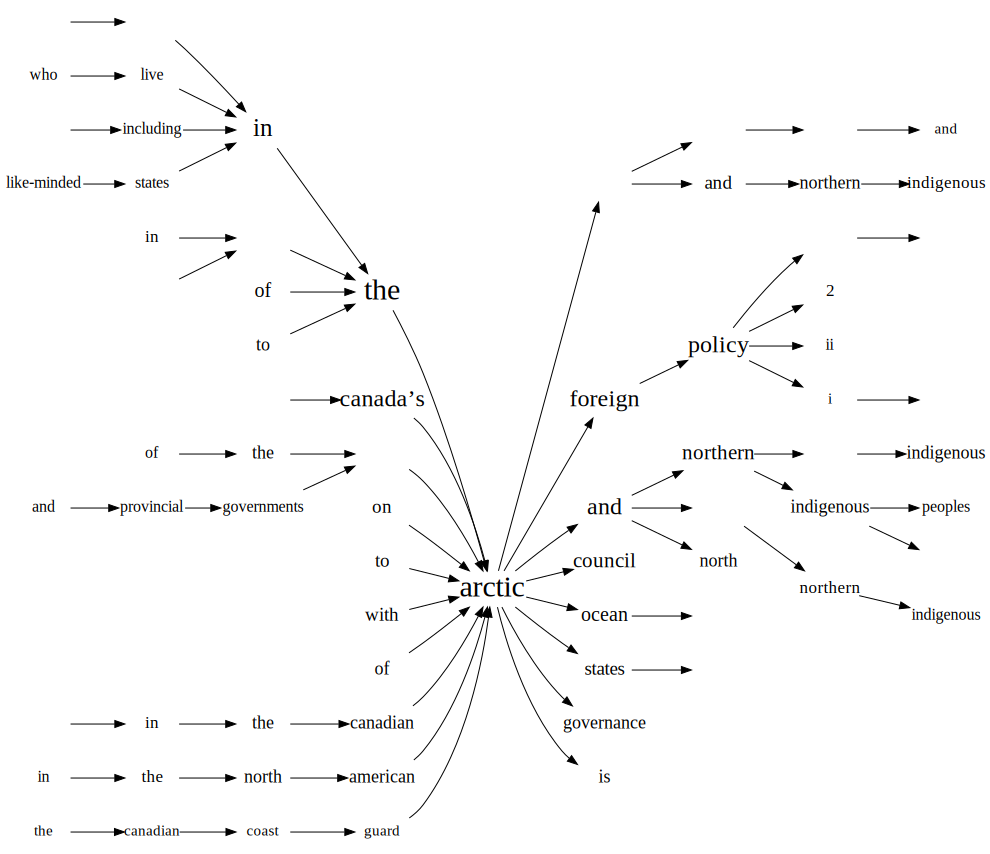

In [ ]:
g = wordtree.search_and_draw(corpus = aican_sentence, keyword = "arctic")
g